In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Load the image in grayscale for simple SVD
img = Image.open('18-10.jpg').convert('L')
img_arr = np.array(img)

In [49]:
# Compute SVD from scratch
U, S, VT = np.linalg.svd(img_arr, full_matrices=False)

In [4]:
U

array([[-1.87570169e-02, -2.05277778e-02,  3.80609817e-03, ...,
         6.32527036e-03,  5.24235664e-04, -1.55450988e-01],
       [-1.87570169e-02, -2.05277778e-02,  3.80609817e-03, ...,
        -1.99909141e-03, -5.55994775e-03,  1.84713719e-01],
       [-1.87570169e-02, -2.05277778e-02,  3.80609817e-03, ...,
        -7.04250281e-03,  2.13490629e-02,  5.50797613e-01],
       ...,
       [-1.87570169e-02, -2.05277778e-02,  3.80609817e-03, ...,
         6.45353302e-03, -2.39879804e-03, -1.64019504e-03],
       [-1.87570169e-02, -2.05277778e-02,  3.80609817e-03, ...,
         1.87507097e-03,  3.74568460e-04, -1.14434402e-03],
       [-1.87570169e-02, -2.05277778e-02,  3.80609817e-03, ...,
        -1.10450298e-01,  1.58561178e-01, -6.99112335e-02]])

In [6]:
print(S)
len(S)


[8.43147124e+05 1.50842181e+05 9.71184422e+04 ... 5.01867185e-11
 2.58533539e-11 1.44555566e-11]


4000

In [50]:
img_arr.shape

(4000, 4000)

In [51]:
U.shape

(4000, 4000)

In [52]:
S.shape

(4000,)

In [53]:
VT.shape

(4000, 4000)

In [54]:
S

array([8.43147124e+05, 1.50842181e+05, 9.71184422e+04, ...,
       5.01867185e-11, 2.58533539e-11, 1.44555566e-11])

In [55]:
def reconstruct_from_svd(U, S, VT, k):
    S_k = np.diag(S[:k])
    return np.dot(U[:, :k], np.dot(S_k, VT[:k, :]))

In [56]:
k = 5000
recon_img = reconstruct_from_svd(U, S, VT, k)

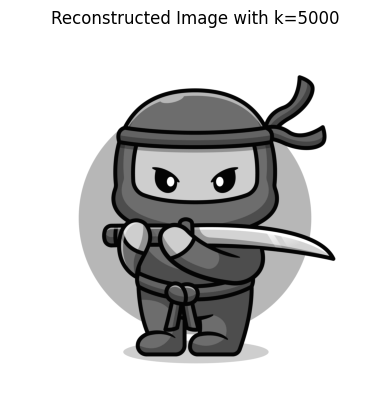

In [57]:
plt.imshow(recon_img, cmap='gray')
plt.title(f'Reconstructed Image with k={k}')
plt.axis('off')
plt.show()


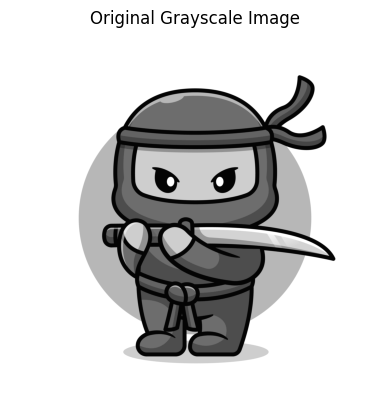

In [21]:
plt.imshow(img_arr, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')
plt.show()


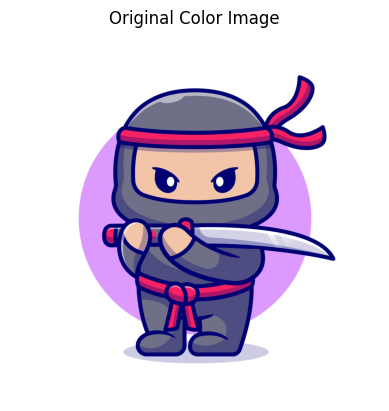

In [22]:
img_color = Image.open('18-10.jpg')
plt.imshow(img_color)
plt.title('Original Color Image')
plt.axis('off')
plt.show()


In [27]:
recon_img_uint8 = np.clip(recon_img, 0, 255).astype(np.uint8)

In [29]:
recon_img_uint8

array([[254, 254, 254, ..., 254, 254, 254],
       [254, 254, 254, ..., 254, 254, 254],
       [254, 254, 254, ..., 254, 254, 254],
       ...,
       [254, 254, 254, ..., 254, 254, 254],
       [254, 254, 254, ..., 254, 254, 254],
       [254, 254, 254, ..., 254, 254, 254]], dtype=uint8)

In [30]:
img_to_save = Image.fromarray(recon_img_uint8)

img_to_save.save('svd_compressed_result.png')

In [66]:
from sklearn.decomposition import TruncatedSVD


k = 40
svd = TruncatedSVD(n_components=k, n_iter=7, random_state=42)

# Fit SVD on image
U = svd.fit_transform(img_arr)
Sigma = svd.singular_values_
VT = svd.components_


U_sigma = U @ np.diag(Sigma)
#recon_img = np.dot(U_sigma, VT)
recon_img = np.dot(U, VT)

# Save the result for comparison
#recon_img_clip = np.clip(recon_img, 0, 255).astype(np.uint8)
#Image.fromarray(recon_img_clip).save('svd_truncated_reconstruct_k_50.png')
'Compressed image saved with TruncatedSVD, k=50 as svd_truncated_reconstruct_k_50.png'

'Compressed image saved with TruncatedSVD, k=50 as svd_truncated_reconstruct_k_50.png'

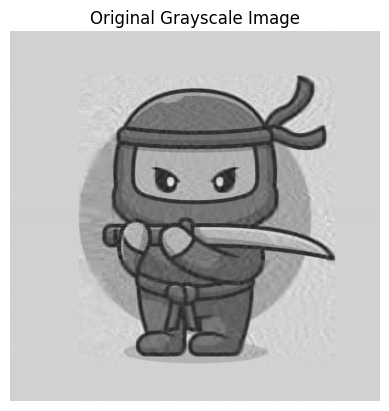

In [67]:
plt.imshow(recon_img, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')
plt.show()

In [69]:
sum(svd.explained_variance_ratio_)

np.float64(0.9666179249693938)